<a href="https://colab.research.google.com/github/sajivjose174/Project/blob/main/Wallmart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement:
Walmart Inc. wants to **analyze** the customer **purchase behavior** against the customer’s gender and the various other factors to help the **business make better decisions**. They want to **understand** if the s**pending habits differ between male and female customers**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
!curl -o bike_sharing.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.9M  100 21.9M    0     0  29.2M      0 --:--:-- --:--:-- --:--:-- 29.2M


In [ ]:
df_wallmart=pd.read_csv('walmart_data.csv')

In [ ]:
df_wallmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Checking data types of all the attributes
df_wallmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#shape of the given data:
df_wallmart.shape

(550068, 10)

In [ ]:
#statistical summary
df_wallmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
#null values check##
df_wallmart.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


#Exploratory Data Analysis

In [ ]:
# Unique Values
for i in df_wallmart.columns:
  print (f"{i}:", df_wallmart[i].nunique())

User_ID: 5891
Product_ID: 3631
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category: 20
Purchase: 18105


In [ ]:
# Value counts
for i in df_wallmart.columns:
  print (f"{i}:", df_wallmart[i].value_counts())

User_ID: User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1004991       7
1005391       7
1000094       7
1005608       7
1000708       6
Name: count, Length: 5891, dtype: int64
Product_ID: Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00325342       1
P00312542       1
P00008942       1
P00315142       1
P00365942       1
Name: count, Length: 3631, dtype: int64
Gender: Gender
M    414259
F    135809
Name: count, dtype: int64
Age: Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Occupation: Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype:

In [ ]:
#top product by number of order count###
top_product=df_wallmart['Product_ID'].value_counts().head(1).index
top_product

Index(['P00265242'], dtype='object', name='Product_ID')

In [ ]:
df_female=df_wallmart.loc[(df_wallmart['Gender']=='F') ]
df_male=df_wallmart.loc[(df_wallmart['Gender']=='M')]

In [ ]:
df_female_topP=df_female['Product_ID'].value_counts().head(1).index
df_female_topP

Index(['P00265242'], dtype='object', name='Product_ID')

In [ ]:
df_male_topP=df_male['Product_ID'].value_counts().head(1).index
df_male_topP

Index(['P00265242'], dtype='object', name='Product_ID')

In [ ]:
#Most popular item by count is Product with ID number P00265242 in both male and female.

In [ ]:
#top selling product in male: (count)
top1=df_wallmart.loc[df_wallmart['Product_ID'].isin (top_product)]
top1[top1['Gender']=='M'].shape

(1372, 10)

In [ ]:
#top selling product in female: (count)
top1[top1['Gender']=='F'].shape

(508, 10)

In [ ]:
#Concluded that the most the popular item is P00265242. Where male customers have brought this patricular item more than female customers.#

In [ ]:
#top user (Most frequent customer): (top3)
top_user=df_wallmart['User_ID'].value_counts().head(3)
top_user

,count
User_ID,
1001680,1026
1004277,979
1001941,898


In [ ]:
#top3 loyal customer details:
df_wallmart.loc[df_wallmart['User_ID']==1001680]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
11055,1001680,P00036742,M,26-35,20,A,3,1,1,15670
11056,1001680,P00130642,M,26-35,20,A,3,1,11,6139
11057,1001680,P00105442,M,26-35,20,A,3,1,11,7607
11058,1001680,P00245642,M,26-35,20,A,3,1,5,8715
11059,1001680,P00123342,M,26-35,20,A,3,1,11,4472
...,...,...,...,...,...,...,...,...,...,...
517447,1001680,P00238742,M,26-35,20,A,3,1,13,774
517448,1001680,P00146742,M,26-35,20,A,3,1,1,4227
517449,1001680,P00285042,M,26-35,20,A,3,1,16,4825
517450,1001680,P00047742,M,26-35,20,A,3,1,16,12539


In [ ]:
#top3 loyal customer details:
df_wallmart.loc[df_wallmart['User_ID']==1004277]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
27930,1004277,P00034742,M,36-45,16,A,0,0,5,8763
27931,1004277,P00028542,M,36-45,16,A,0,0,6,20400
27932,1004277,P00116842,M,36-45,16,A,0,0,2,16070
27933,1004277,P00063342,M,36-45,16,A,0,0,1,15193
27934,1004277,P00359042,M,36-45,16,A,0,0,2,12750
...,...,...,...,...,...,...,...,...,...,...
534407,1004277,P00354242,M,36-45,16,A,0,0,5,6992
534408,1004277,P00370142,M,36-45,16,A,0,0,16,16801
534409,1004277,P00161042,M,36-45,16,A,0,0,14,11491
534410,1004277,P00199942,M,36-45,16,A,0,0,16,12691


In [ ]:
#top3 loyal customer details:
df_wallmart.loc[df_wallmart['User_ID']==1001941]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
12911,1001941,P00262242,M,36-45,17,A,1,0,1,4263
12912,1001941,P00232542,M,36-45,17,A,1,0,11,4544
12913,1001941,P00191742,M,36-45,17,A,1,0,4,1429
12914,1001941,P00031942,M,36-45,17,A,1,0,11,3167
12915,1001941,P00217542,M,36-45,17,A,1,0,1,11765
...,...,...,...,...,...,...,...,...,...,...
519362,1001941,P00020342,M,36-45,17,A,1,0,1,8212
519363,1001941,P00265242,M,36-45,17,A,1,0,5,1815
519364,1001941,P00193342,M,36-45,17,A,1,0,11,1534
519365,1001941,P00328942,M,36-45,17,A,1,0,5,2052


In [ ]:
# shows that top 3 most loyal buyers are  male. (as seen above).

In [ ]:
#Top User IDs by average Purchase value:
df_wallmart.groupby('User_ID')["Purchase"].mean().sort_values(ascending=False).head(3)

,Purchase
User_ID,
1003902,18577.893617
1005069,18490.166667
1005999,18345.944444


In [ ]:
#Top User Ids by average purchase details.
a=df_wallmart.loc[df_wallmart['User_ID']==1003902]
a


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
25374,1003902,P00128942,M,26-35,5,C,2,0,1,19096
25375,1003902,P00243942,M,26-35,5,C,2,0,1,19559
25376,1003902,P00244042,M,26-35,5,C,2,0,1,19637
25377,1003902,P00227642,M,26-35,5,C,2,0,1,19159
64612,1003902,P00046742,M,26-35,5,C,2,0,1,19055
...,...,...,...,...,...,...,...,...,...,...
531953,1003902,P00173842,M,26-35,5,C,2,0,1,19425
531954,1003902,P00334642,M,26-35,5,C,2,0,1,19242
531955,1003902,P00233942,M,26-35,5,C,2,0,1,19265
531956,1003902,P0097342,M,26-35,5,C,2,0,1,19404


In [ ]:
#Top User Ids by average purchase details.
b=df_wallmart.loc[df_wallmart['User_ID']==1005069]
b

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
33017,1005069,P00088242,F,55+,0,C,3,1,6,20629
71995,1005069,P00052842,F,55+,0,C,3,1,10,19131
71996,1005069,P00115742,F,55+,0,C,3,1,6,20081
71997,1005069,P00310842,F,55+,0,C,3,1,6,20244
71998,1005069,P00161842,F,55+,0,C,3,1,10,18581
188304,1005069,P00344242,F,55+,0,C,3,1,8,10024
227561,1005069,P00109242,F,55+,0,C,3,1,6,20454
227562,1005069,P00116142,F,55+,0,C,3,1,10,23096
266635,1005069,P00085342,F,55+,0,C,3,1,10,23193
344791,1005069,P00202242,F,55+,0,C,3,1,10,18719


In [ ]:
#can be inferred that highest spender is a male, followed by female. (details given above)

In [ ]:
#city wise popular product:
df_cityA=df_wallmart.loc[df_wallmart['City_Category']=='A']
df_cityB=df_wallmart.loc[df_wallmart['City_Category']=='B']
df_cityC=df_wallmart.loc[df_wallmart['City_Category']=='C']

In [ ]:
A=df_cityA['Product_ID'].value_counts().head(1).index
A

Index(['P00265242'], dtype='object', name='Product_ID')

In [ ]:
B=df_cityB['Product_ID'].value_counts().head(1).index
B

Index(['P00265242'], dtype='object', name='Product_ID')

In [ ]:
C=df_cityC['Product_ID'].value_counts().head(1).index
C

Index(['P00265242'], dtype='object', name='Product_ID')

In [ ]:
#Shows Product P00265242 is not only popular among the two genders but also popular amonng different city categories.

In [ ]:
#Marital status wise popular product:
M0=df_wallmart.loc[df_wallmart['Marital_Status']==0]
M1=df_wallmart.loc[df_wallmart['Marital_Status']==1]

In [ ]:
M0_t=M0['Product_ID'].value_counts().head(1).index
M0_t

Index(['P00265242'], dtype='object', name='Product_ID')

In [ ]:
M1_t=M1['Product_ID'].value_counts().head(1).index
M1_t

Index(['P00265242'], dtype='object', name='Product_ID')

In [ ]:
#Shows Product P00265242 is not only popular among the two gender but also popular amonng different city categories and among different marital status.

In [ ]:
df_wallmart.groupby('Marital_Status')['Purchase'].mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


In [ ]:
#Group 0 has a higher average spend than Group 1, indicating a difference in purchasing behavior. Walmart could explore tailored strategies for Group 1 to increase engagement.

In [ ]:
#Note:
#since the data explicitly doesnt say which coding is related to the Marital Status i.e( whether 0 is Unmarried, whether 1 is Married or vice-versa).Because even with the abiove table. the avg spending is moe for 0 than 1.
#So Assumptions cannot be made on which value is unmarried/married. Also the dataset is based on Black Friday Sales, where assumptions would entirely make the data biased.

#Graphical Analysis:

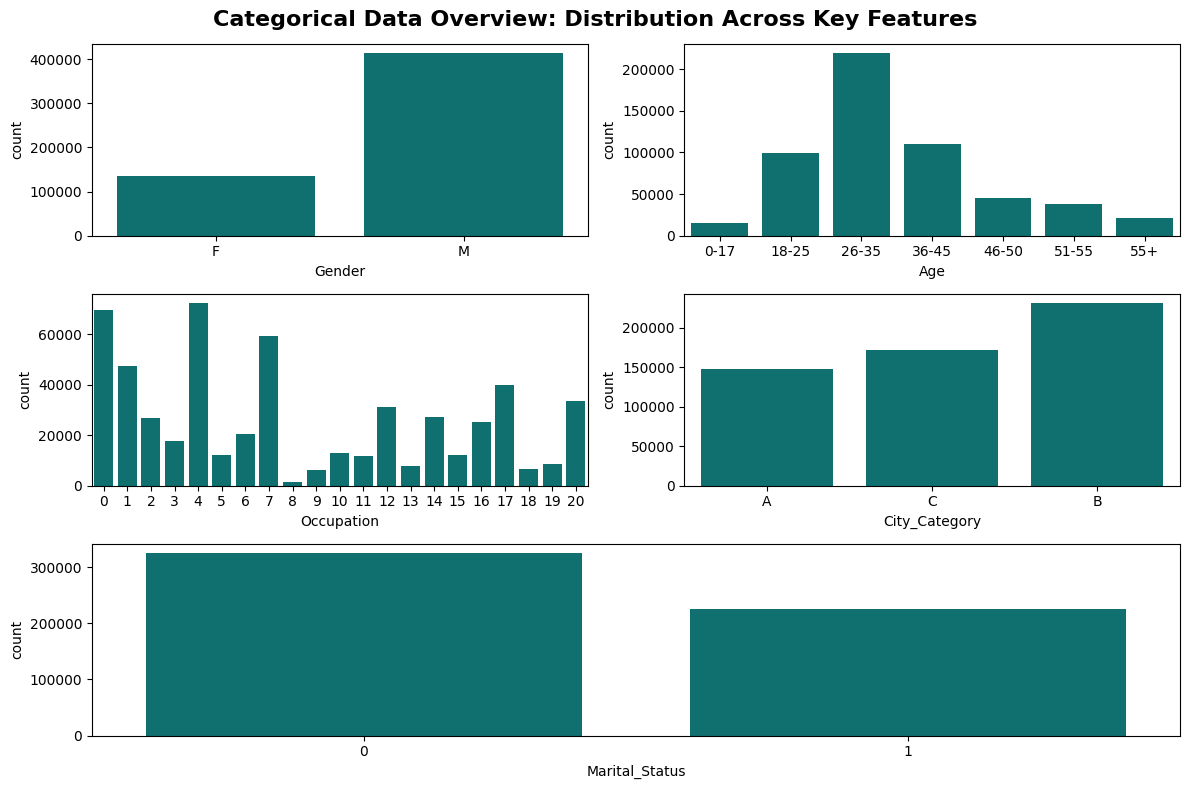

In [ ]:
#Categorical Data Overview: Distribution Across Key Features (covers all the needed barplots,histogram from the dataset):

plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
sns.countplot(df_wallmart,x=df_wallmart['Gender'],color='Teal')

plt.subplot(3,2,2)
sns.countplot(data=df_wallmart, x='Age', order=sorted(df_wallmart['Age'].unique()),color='Teal')

plt.subplot(3,2,3)
sns.countplot(df_wallmart,x=df_wallmart['Occupation'],color='Teal')


plt.subplot(3,2,4)
sns.countplot(df_wallmart,x=df_wallmart['City_Category'],color='Teal')


plt.subplot(3,2,(5,6))
sns.countplot(df_wallmart,x=df_wallmart['Marital_Status'],color='Teal')

plt.suptitle("Categorical Data Overview: Distribution Across Key Features", fontsize=16, fontweight='bold')
plt.tight_layout()

<Axes: title={'center': 'Top Product By Number Of Orders Distrbution(Gender-wise)'}, xlabel='Gender', ylabel='count'>

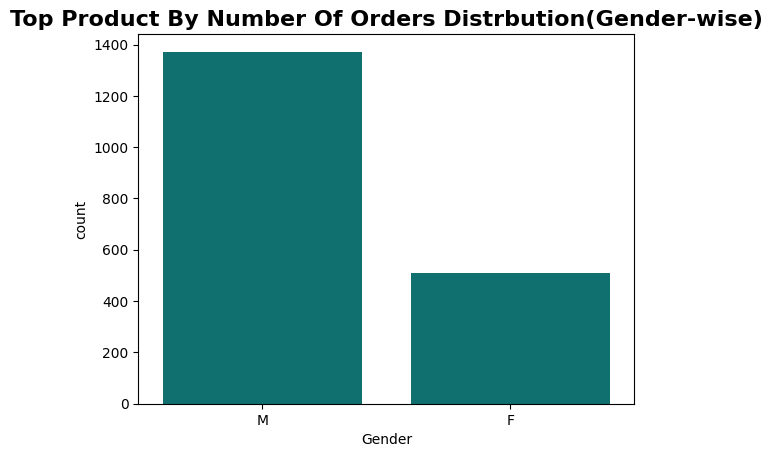

In [ ]:
plt.title("Top Product By Number Of Orders Distrbution(Gender-wise)", fontsize=16, fontweight='bold')
sns.countplot(top1,x=top1['Gender'],color='Teal')

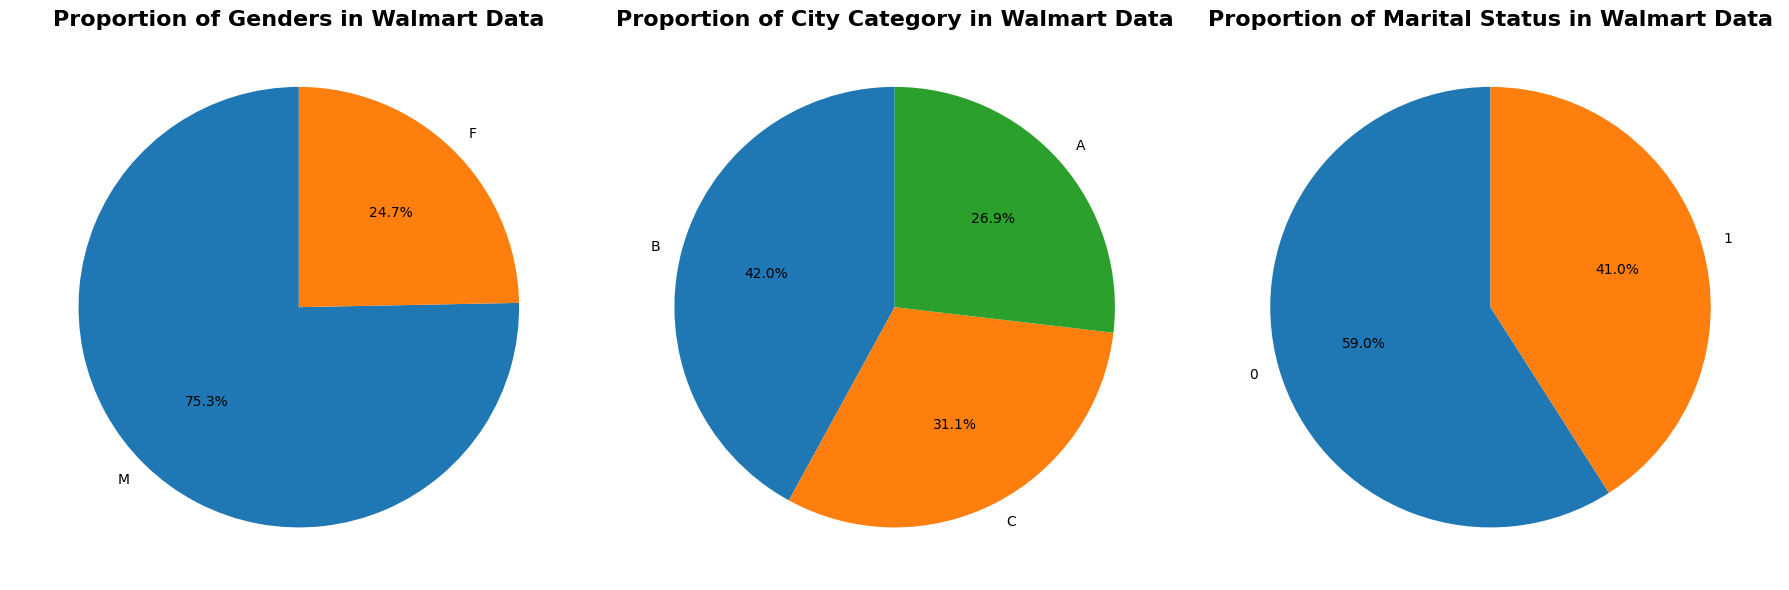

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.title("Proportion of Genders in Walmart Data", fontsize=16, fontweight='bold')
sizes = df_wallmart["Gender"].value_counts()
labels=sizes.index
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=90)
plt.axis('equal')


plt.subplot(1,3,2)
plt.title("Proportion of City Category in Walmart Data", fontsize=16, fontweight='bold')
sizes1 = df_wallmart["City_Category"].value_counts()
labels1=sizes1.index
plt.pie(sizes1,labels=labels1,autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.subplot(1,3,3)
plt.title("Proportion of Marital Status in Walmart Data", fontsize=16, fontweight='bold')
sizes2 = df_wallmart["Marital_Status"].value_counts()
labels2=sizes2.index
plt.pie(sizes2,labels=labels2,autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.tight_layout()
plt.show()


<ipython-input-60-5b738318e58b>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Teal'` for the same effect.

  sns.countplot(df_wallmart,x=df_wallmart['City_Category'],hue="Gender",color='Teal')


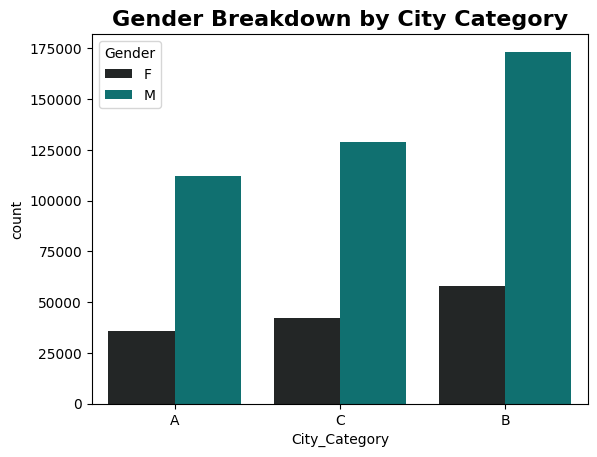

In [ ]:
plt.title("Gender Breakdown by City Category", fontsize=16, fontweight='bold')
sns.countplot(df_wallmart,x=df_wallmart['City_Category'],hue="Gender",color='Teal')
plt.show()

<ipython-input-61-b8c275ce98f3>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Teal'` for the same effect.

  sns.countplot(df_wallmart,x=df_wallmart['Stay_In_Current_City_Years'],hue="Gender",color='Teal')


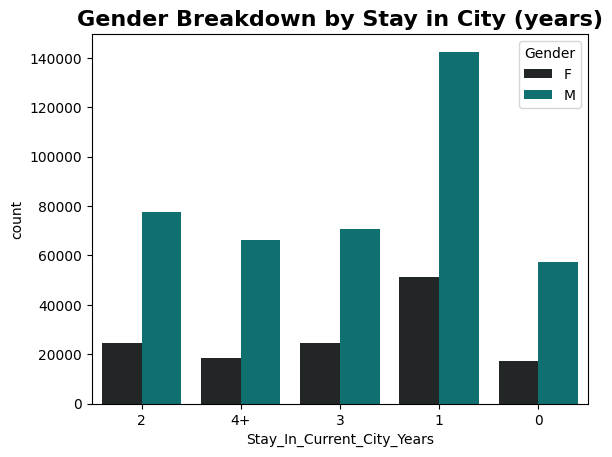

In [ ]:
plt.title("Gender Breakdown by Stay in City (years)", fontsize=16, fontweight='bold')
sns.countplot(df_wallmart,x=df_wallmart['Stay_In_Current_City_Years'],hue="Gender",color='Teal')
plt.show()

<Axes: title={'center': 'Correlation between city category and gender w.r.t median'}, xlabel='City_Category', ylabel='Gender'>

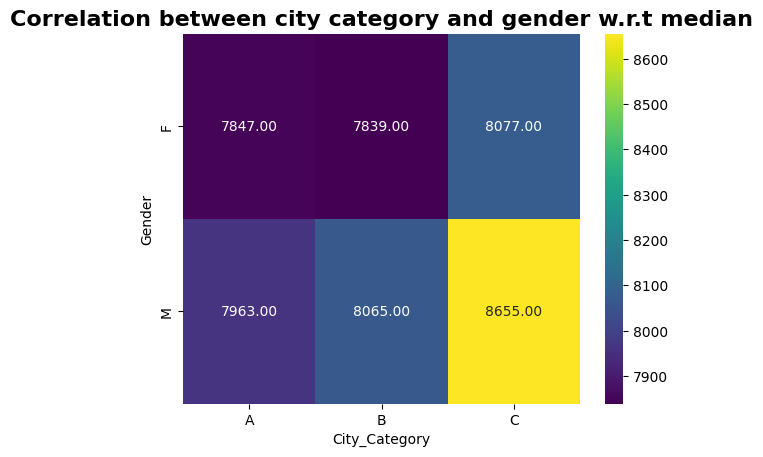

In [ ]:
#Bivariate Analysis:
plt.title("Correlation between city category and gender w.r.t median", fontsize=16, fontweight='bold')
pivot=df_wallmart.pivot_table(values='Purchase',index='Gender',columns='City_Category',aggfunc='median')
sns.heatmap(pivot, annot=True, fmt='.2f',cmap='viridis')

<Axes: title={'center': 'Correlation between age and gender w.r.t median'}, xlabel='Age', ylabel='Gender'>

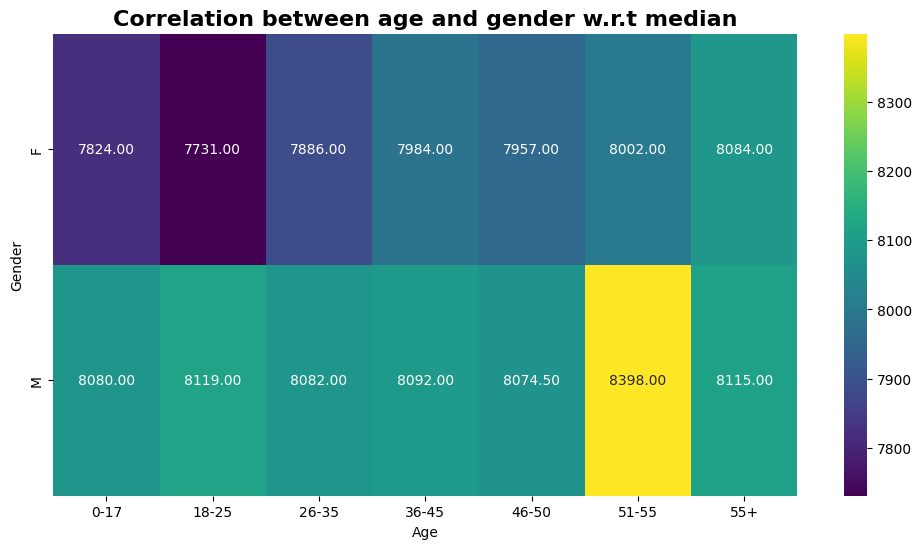

In [ ]:
#Bivariate Analysis:
plt.figure(figsize=(12, 6))
plt.title("Correlation between age and gender w.r.t median", fontsize=16, fontweight='bold')
pivot=df_wallmart.pivot_table(values='Purchase',index='Gender',columns='Age',aggfunc='median')
sns.heatmap(pivot, annot=True, fmt='.2f',cmap='viridis')

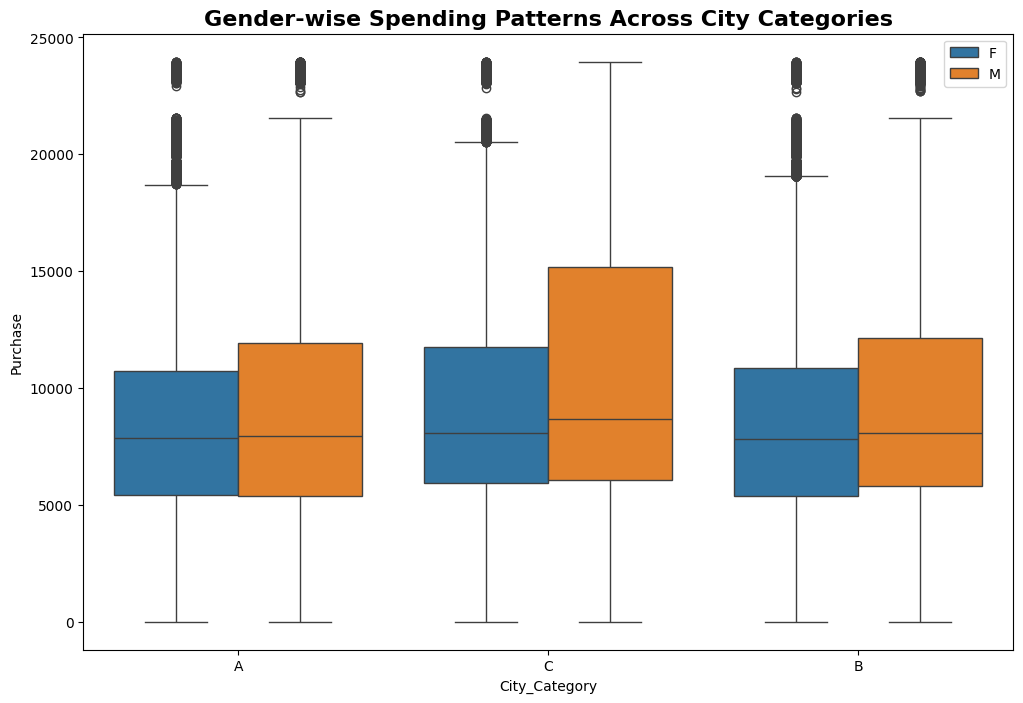

In [ ]:
#outlier checks: Bivariate Analysis
plt.figure(figsize=(12,8))
plt.title("Gender-wise Spending Patterns Across City Categories", fontsize=16, fontweight='bold')
sns.boxplot(df_wallmart,x='City_Category',y='Purchase',hue="Gender")
plt.legend(loc='best')

In [ ]:
#outlier detection (IQR):

df_Amale=df_wallmart.loc[(df_wallmart['Gender']=='M') & (df_wallmart['City_Category']=='A')]
df_Afemale=df_wallmart.loc[(df_wallmart['Gender']=='F') & (df_wallmart['City_Category']=='A')]
#upper limit
Q1_A=np.percentile(df_Amale['Purchase'],25)
Q3_A=np.percentile(df_Amale['Purchase'],75)
IQR=Q3_A-Q1_A
upper_limit=Q3_A+(1.5*IQR)
outlier=df_Amale[df_Amale['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
3166,1000523,P00117642,M,51-55,7,A,1,1,10,23159
3167,1000523,P00200642,M,51-55,7,A,1,1,10,23741
3172,1000524,P00346542,M,18-25,0,A,0,0,10,23728
3391,1000549,P00346542,M,26-35,6,A,3,0,10,23239
3908,1000645,P00116142,M,36-45,20,A,2,0,10,23395
...,...,...,...,...,...,...,...,...,...,...
540910,1005300,P00087042,M,26-35,20,A,0,0,10,23448
541905,1005448,P00116142,M,46-50,19,A,4+,0,10,23146
543514,1005680,P00085342,M,51-55,20,A,4+,1,10,23682
543515,1005680,P00087042,M,51-55,20,A,4+,1,10,23273


In [ ]:
Q1_A=np.percentile(df_Afemale['Purchase'],25)
Q3_A=np.percentile(df_Afemale['Purchase'],75)
IQR=Q3_A-Q1_A
upper_limit=Q3_A+(1.5*IQR)
outlier=df_Afemale[df_Afemale['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
547,1000101,P00278042,F,18-25,3,A,1,0,1,19464
548,1000101,P00154042,F,18-25,3,A,1,0,1,19027
549,1000101,P00014042,F,18-25,3,A,1,0,1,19394
1493,1000242,P00127442,F,18-25,4,A,3,0,1,18994
...,...,...,...,...,...,...,...,...,...,...
544889,1005878,P0098242,F,26-35,0,A,4+,1,1,19121
545135,1005917,P00328742,F,51-55,1,A,2,1,1,19521
545402,1005961,P00228342,F,46-50,0,A,3,0,1,19564
545618,1005997,P00121042,F,26-35,7,A,3,0,15,20743


In [ ]:
df_Bfemale=df_wallmart.loc[(df_wallmart['Gender']=='F') & (df_wallmart['City_Category']=='B')]
df_Bmale=df_wallmart.loc[(df_wallmart['Gender']=='M') & (df_wallmart['City_Category']=='B')]
#upper limit
Q1_A=np.percentile(df_Bfemale['Purchase'],25)
Q3_A=np.percentile(df_Bfemale['Purchase'],75)
IQR=Q3_A-Q1_A
upper_limit=Q3_A+(1.5*IQR)
outlier=df_Bfemale[df_Bfemale['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
73,1000018,P00112642,F,18-25,3,B,3,0,1,19473
74,1000018,P00118442,F,18-25,3,B,3,0,1,19672
75,1000018,P00034442,F,18-25,3,B,3,0,1,19313
778,1000146,P00274042,F,36-45,20,B,3,1,1,19177
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544795,1005861,P00255842,F,51-55,1,B,1,1,16,20440
545461,1005972,P00255842,F,26-35,20,B,0,0,16,20634
545559,1005990,P00112942,F,26-35,20,B,1,1,1,19184
545856,1006036,P00279742,F,26-35,15,B,4+,1,16,20766


In [ ]:
Q1_A=np.percentile(df_Bmale['Purchase'],25)
Q3_A=np.percentile(df_Bmale['Purchase'],75)
IQR=Q3_A-Q1_A
upper_limit=Q3_A+(1.5*IQR)
outlier=df_Bmale[df_Bmale['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
1445,1000235,P00116142,M,26-35,0,B,0,0,10,23826
1902,1000304,P00273342,M,26-35,0,B,1,0,10,23139
6543,1001058,P00052842,M,26-35,1,B,2,0,10,23892
...,...,...,...,...,...,...,...,...,...,...
541035,1005319,P00184242,M,18-25,17,B,1,0,9,22989
541477,1005376,P00116142,M,26-35,17,B,1,1,10,23921
542215,1005493,P00052842,M,36-45,12,B,3,0,10,23800
544417,1005811,P00117642,M,18-25,4,B,3,0,10,23284


In [ ]:
df_Cfemale=df_wallmart.loc[(df_wallmart['Gender']=='F') & (df_wallmart['City_Category']=='C')]
df_Cmale=df_wallmart.loc[(df_wallmart['Gender']=='M') & (df_wallmart['City_Category']=='C')]
#upper limit
Q1_A=np.percentile(df_Cfemale['Purchase'],25)
Q3_A=np.percentile(df_Cfemale['Purchase'],75)
IQR=Q3_A-Q1_A
upper_limit=Q3_A+(1.5*IQR)
outlier=df_Cfemale[df_Cfemale['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
731,1000139,P00020142,F,26-35,20,C,2,0,7,21002
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
3642,1000590,P00018542,F,36-45,6,C,1,0,16,20840
3712,1000605,P00263542,F,18-25,4,C,0,0,16,20788
5131,1000840,P00088242,F,26-35,3,C,1,1,6,20625
...,...,...,...,...,...,...,...,...,...,...
540369,1005197,P00115742,F,55+,3,C,3,1,6,20642
540386,1005200,P00320442,F,36-45,15,C,2,0,6,20564
541705,1005418,P00086242,F,26-35,0,C,1,1,10,23936
541898,1005446,P00111742,F,51-55,1,C,1,1,15,21198


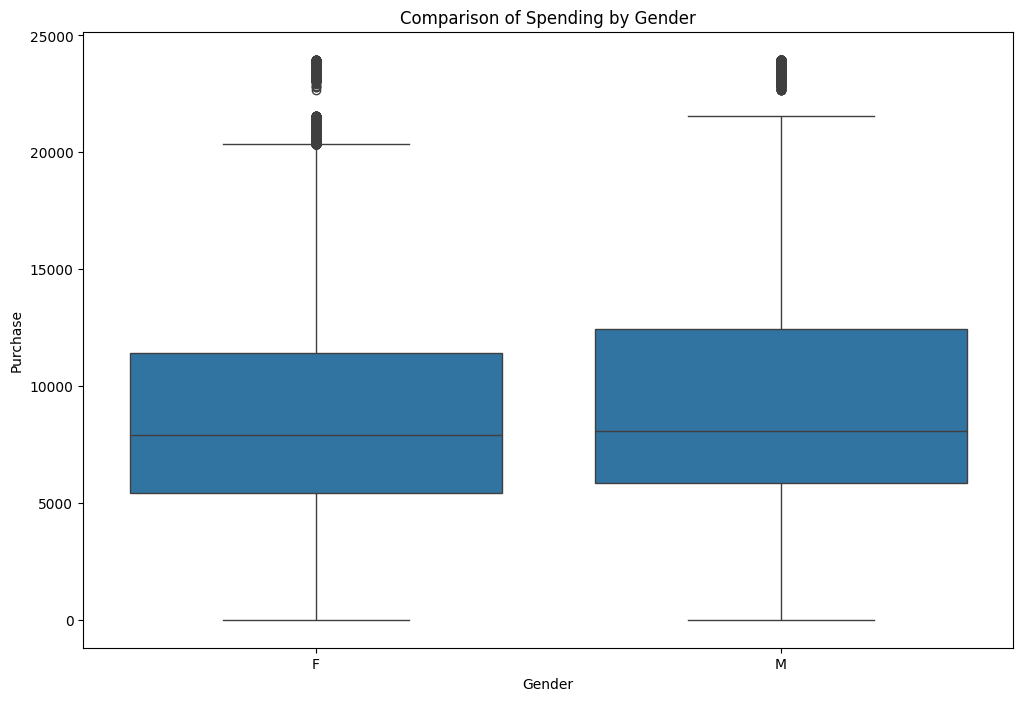

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df_wallmart,x='Gender',y='Purchase')
plt.title("Comparing Spending Behavior Between Male and Female Customers", fontsize=16, fontweight='bold')
plt.title("Comparison of Spending by Gender")
plt.show()

<Axes: title={'center': 'Underlying Distribution Shape'}, xlabel='Purchase', ylabel='Count'>

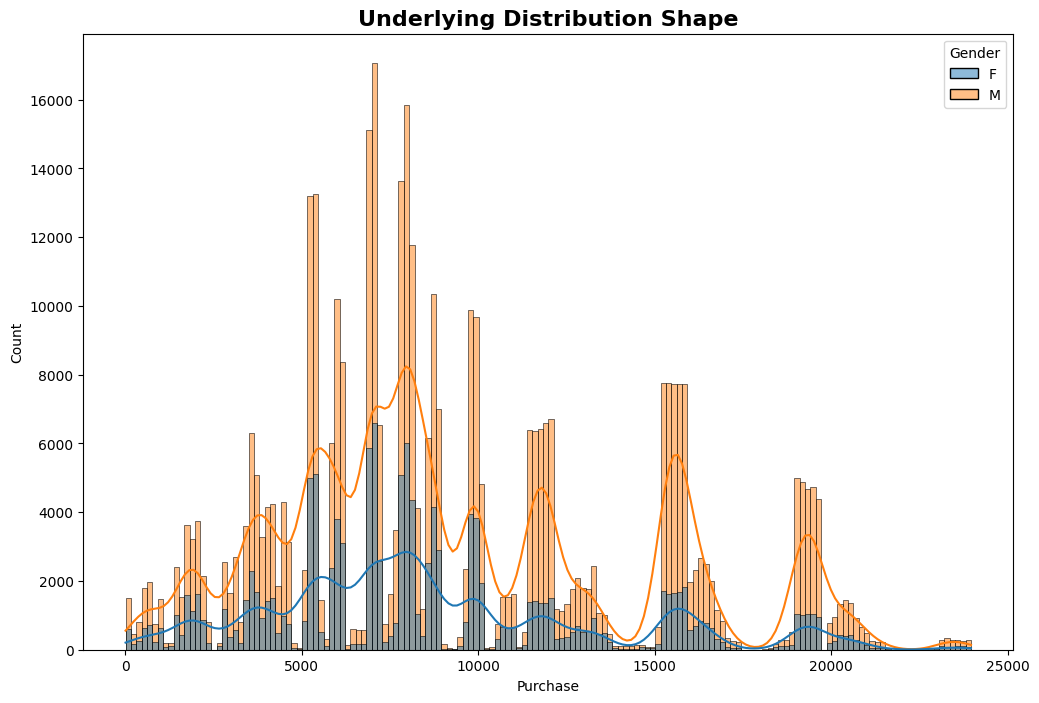

In [ ]:
#to get an idea of the underlying distribution:
plt.figure(figsize=(12,8))
plt.title("Underlying Distribution Shape", fontsize=16, fontweight='bold')
sns.histplot(data=df_wallmart, x='Purchase', hue='Gender', kde=True)

In [ ]:
#Outlier Detection: (IQR)
df_female=df_wallmart.loc[(df_wallmart['Gender']=='F') ]
df_male=df_wallmart.loc[(df_wallmart['Gender']=='M')]
Q1_A=np.percentile(df_female['Purchase'],25)
Q3_A=np.percentile(df_female['Purchase'],75)
IQR=Q3_A-Q1_A
upper_limit=Q3_A+(1.5*IQR)
outlier=df_female[df_female['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
731,1000139,P00020142,F,26-35,20,C,2,0,7,21002
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
1106,1000187,P00247642,F,46-50,1,B,1,0,7,20771
...,...,...,...,...,...,...,...,...,...,...
545461,1005972,P00255842,F,26-35,20,B,0,0,16,20634
545618,1005997,P00121042,F,26-35,7,A,3,0,15,20743
545834,1006029,P00327342,F,26-35,1,C,1,1,16,20616
545856,1006036,P00279742,F,26-35,15,B,4+,1,16,20766


In [ ]:
Q1_A=np.percentile(df_male['Purchase'],25)
Q3_A=np.percentile(df_male['Purchase'],75)
IQR=Q3_A-Q1_A
upper_limit=Q3_A+(1.5*IQR)
outlier=df_male[df_male['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
1445,1000235,P00116142,M,26-35,0,B,0,0,10,23826
1902,1000304,P00273342,M,26-35,0,B,1,0,10,23139
3166,1000523,P00117642,M,51-55,7,A,1,1,10,23159
...,...,...,...,...,...,...,...,...,...,...
543995,1005757,P00052842,M,0-17,10,C,2,0,10,23945
544417,1005811,P00117642,M,18-25,4,B,3,0,10,23284
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [ ]:
#Confidence intervals and distribution of the mean of the expenses by female and male customers:
#Sample size= 10,0000##

sample_male = df_wallmart[df_wallmart['Gender'] == 'M']['Purchase'].sample(n=10000, random_state=42)
sample_female = df_wallmart[df_wallmart['Gender'] == 'F']['Purchase'].sample(n=10000, random_state=42)


#CI for Males:
n1=len(sample_male)
sigma1=sample_male.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_male.mean()
ci_male = stats.norm.interval(0.95, loc=mean1, scale=se1)


#CI for female:
n2=len(sample_female)
sigma2=sample_female.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_female.mean()
ci_female = stats.norm.interval(0.95, loc=mean2, scale=se2)

print("Confidence interval for males at 95%:",ci_male)
print("Confidence interval for females at 95%:",ci_female)



Confidence interval for males at 95%: (np.float64(9409.419092422633), np.float64(9609.689907577367))
Confidence interval for females at 95%: (np.float64(8655.32831936514), np.float64(8843.525280634858))


In [ ]:
ci_male = stats.norm.interval(0.90, loc=mean1, scale=se1)
ci_female = stats.norm.interval(0.90, loc=mean2, scale=se2)
print("Confidence interval for males at 90%:",ci_male)
print("Confidence interval for females at 90%:",ci_female)

Confidence interval for males at 90%: (np.float64(9425.518216864652), np.float64(9593.590783135349))
Confidence interval for females at 90%: (np.float64(8670.456865662562), np.float64(8828.396734337437))


In [ ]:
ci_male = stats.norm.interval(0.99, loc=mean1, scale=se1)
ci_female = stats.norm.interval(0.99, loc=mean2, scale=se2)
print("Confidence interval for males at 99%:",ci_male)
print("Confidence interval for females at 99%:",ci_female)

Confidence interval for males at 99%: (np.float64(9377.954266936982), np.float64(9641.154733063018))
Confidence interval for females at 99%: (np.float64(8625.760433806247), np.float64(8873.093166193752))


In [ ]:
male1=df_wallmart.loc[df_wallmart['Gender']=='M']['Purchase'].mean()
female1=df_wallmart.loc[df_wallmart['Gender']=='F']['Purchase'].mean()
gap=male1-female1
print(gap)
gap_percentage_gender=(gap/female1)*100
gap_percentage_gender

702.9602753167892


np.float64(8.048027735060238)

In [ ]:
# below sample size of 5000 was used.#

In [ ]:
#Confidence intervals and distribution of the mean of the expenses by female and male customers:
#Sample size= 5000##
sample_male = df_wallmart[df_wallmart['Gender'] == 'M']['Purchase'].sample(n=5000, random_state=42)
sample_female = df_wallmart[df_wallmart['Gender'] == 'F']['Purchase'].sample(n=5000, random_state=42)
#CI for Males:
n1=len(sample_male)
sigma1=sample_male.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_male.mean()
ci_male = stats.norm.interval(0.95, loc=mean1, scale=se1)


#CI for female:
n2=len(sample_female)
sigma2=sample_female.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_female.mean()
ci_female = stats.norm.interval(0.95, loc=mean2, scale=se2)

print("Confidence interval for males at 95%:",ci_male)
print("Confidence interval for females at 95%:",ci_female)

Confidence interval for males at 95%: (np.float64(9389.650001949469), np.float64(9675.27759805053))
Confidence interval for females at 95%: (np.float64(8637.879832286644), np.float64(8905.873767713356))


In [ ]:
ci_male = stats.norm.interval(0.90, loc=mean1, scale=se1)
ci_female = stats.norm.interval(0.90, loc=mean2, scale=se2)
print("Confidence interval for males at 90%:",ci_male)
print("Confidence interval for females at 90%:",ci_female)

Confidence interval for males at 90%: (np.float64(9412.610682516693), np.float64(9652.316917483306))
Confidence interval for females at 90%: (np.float64(8659.422999786148), np.float64(8884.330600213852))


In [ ]:
ci_male = stats.norm.interval(0.99, loc=mean1, scale=se1)
ci_female = stats.norm.interval(0.99, loc=mean2, scale=se2)
print("Confidence interval for males at 99%:",ci_male)
print("Confidence interval for females at 99%:",ci_female)

Confidence interval for males at 99%: (np.float64(9344.7746542446), np.float64(9720.152945755399))
Confidence interval for females at 99%: (np.float64(8595.77493346302), np.float64(8947.97866653698))


The wider interval for males suggests that their purchase amounts tend to be higher, and the interval for females suggests that their purchase amounts are lower.

Average spending of male is 8.04% more than female.
More tailored marketing strategies towards female could help close the gap between avg male and avg female spending. Also continue customer retention for males.

We observed no overlap in the 95% confidence intervals of average spending between male and female customers, suggesting a statistically significant difference. Even at 99% confidence, this gap persists, reinforcing the conclusion.

Text(0.5, 1.0, 'Purchase Distribution by Age Group')

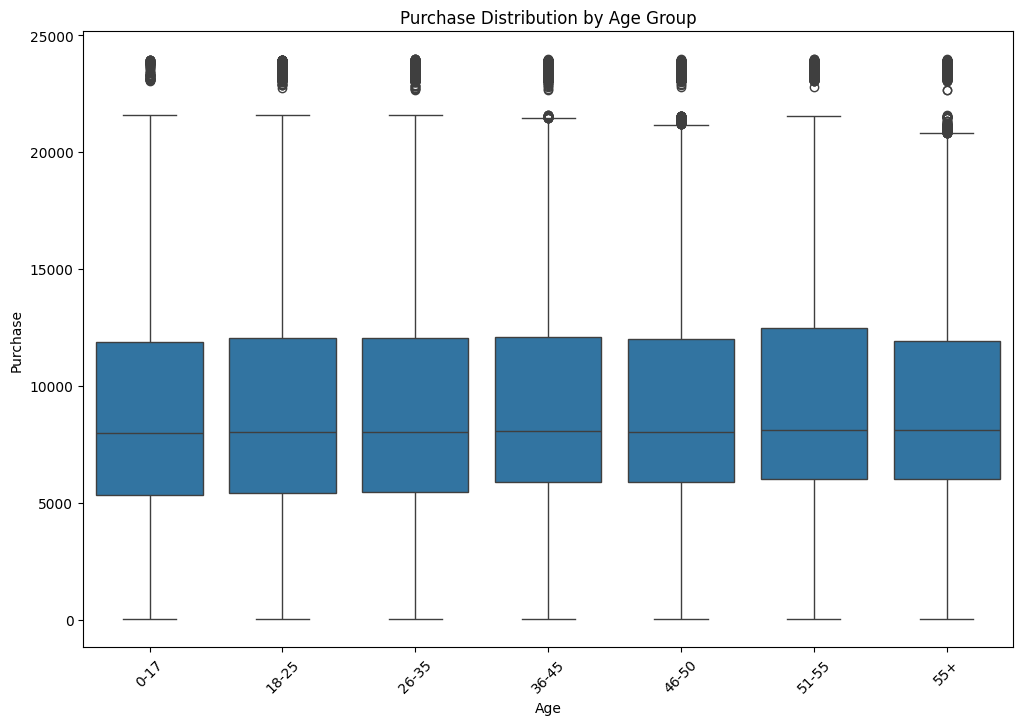

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Spending Patterns by Age Group", fontsize=16, fontweight='bold')
sns.boxplot(x='Age', y='Purchase', data=df_wallmart,order=sorted(df_wallmart['Age'].unique()))
plt.xticks(rotation=45)
plt.title("Purchase Distribution by Age Group")

In [ ]:
#Age wise outlier detection using IQR:

df_age1=df_wallmart.loc[(df_wallmart['Age']=='0-17') ]
df_age2=df_wallmart.loc[(df_wallmart['Age']=='18-25') ]
df_age3=df_wallmart.loc[(df_wallmart['Age']=='26-35')]
df_age4=df_wallmart.loc[(df_wallmart['Age']=='36-45') ]
df_age5=df_wallmart.loc[(df_wallmart['Age']=='46-50') ]
df_age6=df_wallmart.loc[(df_wallmart['Age']=='51-55') ]
df_age7=df_wallmart.loc[(df_wallmart['Age']=='55+') ]

Q1_A1=np.percentile(df_age1['Purchase'],25)
Q3_A1=np.percentile(df_age1['Purchase'],75)

Q1_A2=np.percentile(df_age2['Purchase'],25)
Q3_A2=np.percentile(df_age2['Purchase'],75)

Q1_A3=np.percentile(df_age3['Purchase'],25)
Q3_A3=np.percentile(df_age3['Purchase'],75)

Q1_A4=np.percentile(df_age4['Purchase'],25)
Q3_A4=np.percentile(df_age4['Purchase'],75)

Q1_A5=np.percentile(df_age5['Purchase'],25)
Q3_A5=np.percentile(df_age5['Purchase'],75)

Q1_A6=np.percentile(df_age6['Purchase'],25)
Q3_A6=np.percentile(df_age6['Purchase'],75)

Q1_A7=np.percentile(df_age7['Purchase'],25)
Q3_A7=np.percentile(df_age7['Purchase'],75)


In [ ]:
IQR1=Q3_A1-Q1_A1
upper_limit=Q3_A1+(1.5*IQR1)
outlier=df_age1[df_age1['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
5059,1000829,P00085342,M,0-17,19,A,2,0,10,23562
5060,1000829,P00087042,M,0-17,19,A,2,0,10,23182
7640,1001182,P00086242,M,0-17,10,B,3,0,10,23280
29599,1004493,P00087042,F,0-17,10,A,1,0,10,23847
37343,1005757,P00159542,M,0-17,10,C,2,0,10,23405
48419,1001425,P00159542,M,0-17,10,B,1,0,10,23089
49286,1001563,P00119342,F,0-17,10,B,0,0,10,23502
76351,1005768,P00087042,F,0-17,7,C,3,0,10,23820
90579,1001926,P00087042,F,0-17,0,B,1,0,10,23866
110803,1005063,P00200642,F,0-17,10,B,3,0,10,23757


In [ ]:
IQR2=Q3_A2-Q1_A2
upper_limit=Q3_A2+(1.5*IQR2)
outlier=df_age2[df_age2['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
3172,1000524,P00346542,M,18-25,0,A,0,0,10,23728
6999,1001117,P00052842,M,18-25,14,B,3,0,10,23366
7201,1001134,P00052842,M,18-25,20,C,1,0,10,23632
7948,1001234,P00200642,M,18-25,4,B,2,0,10,23596
...,...,...,...,...,...,...,...,...,...,...
539127,1005011,P00159542,M,18-25,4,B,1,0,10,23563
540437,1005219,P00159542,M,18-25,4,B,2,1,10,23214
541035,1005319,P00184242,M,18-25,17,B,1,0,9,22989
544417,1005811,P00117642,M,18-25,4,B,3,0,10,23284


In [ ]:
IQR3=Q3_A3-Q1_A3
upper_limit=Q3_A3+(1.5*IQR3)
outlier=df_age3[df_age3['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
1445,1000235,P00116142,M,26-35,0,B,0,0,10,23826
1902,1000304,P00273342,M,26-35,0,B,1,0,10,23139
...,...,...,...,...,...,...,...,...,...,...
543136,1005629,P00052842,M,26-35,14,C,1,0,10,23889
543823,1005736,P00052842,M,26-35,1,A,3,1,10,23642
544015,1005759,P00200642,F,26-35,1,A,2,0,10,23680
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753


In [ ]:
IQR4=Q3_A4-Q1_A4
upper_limit=Q3_A4+(1.5*IQR4)
outlier=df_age4[df_age4['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
3908,1000645,P00116142,M,36-45,20,A,2,0,10,23395
4148,1000679,P00052842,M,36-45,16,C,4+,1,10,23384
5907,1000957,P00085342,M,36-45,1,C,2,1,10,23650
6516,1001053,P00087042,M,36-45,0,C,2,1,10,23181
...,...,...,...,...,...,...,...,...,...,...
540157,1005157,P00116142,M,36-45,1,C,2,1,10,23258
542215,1005493,P00052842,M,36-45,12,B,3,0,10,23800
543393,1005663,P00052842,F,36-45,20,B,4+,0,10,23726
543968,1005755,P00087042,F,36-45,2,B,1,0,10,23739


In [ ]:
IQR5=Q3_A5-Q1_A5
upper_limit=Q3_A5+(1.5*IQR5)
outlier=df_age5[df_age5['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
5493,1000889,P00117642,M,46-50,20,A,1,0,10,23564
5494,1000889,P00086242,M,46-50,20,A,1,0,10,23595
5620,1000905,P00052842,F,46-50,12,C,1,0,10,23449
10016,1001533,P00085342,M,46-50,1,C,0,1,10,23824
10738,1001643,P00346542,M,46-50,2,C,4+,0,10,23604
...,...,...,...,...,...,...,...,...,...,...
536807,1004614,P00116142,F,46-50,1,B,1,0,10,23904
540711,1005265,P00200642,M,46-50,1,B,2,1,10,23907
541905,1005448,P00116142,M,46-50,19,A,4+,0,10,23146
542379,1005520,P00085342,M,46-50,1,C,0,1,10,23675


In [ ]:
IQR6=Q3_A6-Q1_A6
upper_limit=Q3_A6+(1.5*IQR6)
outlier=df_age6[df_age6['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
3166,1000523,P00117642,M,51-55,7,A,1,1,10,23159
3167,1000523,P00200642,M,51-55,7,A,1,1,10,23741
5953,1000968,P00159542,M,51-55,12,A,4+,1,10,23126
6585,1001062,P00086242,M,51-55,19,C,3,0,10,23912
8059,1001250,P00086242,M,51-55,0,C,1,1,10,23251
...,...,...,...,...,...,...,...,...,...,...
535066,1004373,P00200642,M,51-55,12,C,1,1,10,23102
538048,1004815,P00085342,F,51-55,18,C,0,1,10,23280
543514,1005680,P00085342,M,51-55,20,A,4+,1,10,23682
543515,1005680,P00087042,M,51-55,20,A,4+,1,10,23273


In [ ]:
IQR7=Q3_A7-Q1_A7
upper_limit=Q3_A7+(1.5*IQR7)
outlier=df_age7[df_age7['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
7542,1001178,P00116142,M,55+,0,C,1,1,10,23958
13404,1002002,P00119342,F,55+,13,C,2,1,10,23343
14860,1002204,P00209642,M,55+,3,B,4+,1,15,21194
15356,1002293,P00117642,F,55+,3,B,1,1,10,23533
15357,1002293,P00200642,F,55+,3,B,1,1,10,23589
...,...,...,...,...,...,...,...,...,...,...
529550,1003592,P00247642,F,55+,2,B,2,1,7,21026
531875,1003891,P00111042,F,55+,16,A,1,1,15,21558
533829,1004180,P00111742,M,55+,13,C,1,1,15,21068
537208,1004679,P00085342,M,55+,13,C,4+,1,10,23342


In [ ]:
#Confidence intervals and distribution of the mean of the expenses by differnt age groups:
#Sample size= 10,0000 ##

sample_age1 = df_wallmart[df_wallmart['Age'] == '0-17']['Purchase'].sample(n=10000, random_state=42)
sample_age2 = df_wallmart[df_wallmart['Age'] == '18-25']['Purchase'].sample(n=10000, random_state=42)
sample_age3 = df_wallmart[df_wallmart['Age'] == '26-35']['Purchase'].sample(n=10000, random_state=42)
sample_age4 = df_wallmart[df_wallmart['Age'] == '36-45']['Purchase'].sample(n=10000, random_state=42)
sample_age5 = df_wallmart[df_wallmart['Age'] == '46-50']['Purchase'].sample(n=10000, random_state=42)
sample_age6 = df_wallmart[df_wallmart['Age'] == '51-55']['Purchase'].sample(n=10000, random_state=42)
sample_age7 = df_wallmart[df_wallmart['Age'] == '55+']['Purchase'].sample(n=10000, random_state=42)


#At confidence level of 95%:
#CI for AGE 0-17:
n1=len(sample_age1)
sigma1=sample_age1.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_age1.mean()
ci_age1 = stats.norm.interval(0.95, loc=mean1, scale=se1)


#CI for AGE 18-25:
n2=len(sample_age2)
sigma2=sample_age2.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_age2.mean()
ci_age2= stats.norm.interval(0.95, loc=mean2, scale=se2)


#CI for AGE 26-35:
n3=len(sample_age3)
sigma3=sample_age3.std()
se3=sigma3/np.sqrt(n3)
mean3=sample_age3.mean()
ci_age3 = stats.norm.interval(0.95, loc=mean3, scale=se3)


#CI for AGE 36-45:
n4=len(sample_age4)
sigma4=sample_age4.std()
se4=sigma4/np.sqrt(n4)
mean4=sample_age4.mean()
ci_age4 = stats.norm.interval(0.95, loc=mean4, scale=se4)


#CI for AGE 46-50:
n5=len(sample_age5)
sigma5=sample_age5.std()
se5=sigma5/np.sqrt(n5)
mean5=sample_age5.mean()
ci_age5 = stats.norm.interval(0.95, loc=mean5, scale=se5)


#CI for AGE 51-55:
n6=len(sample_age6)
sigma6=sample_age6.std()
se6=sigma6/np.sqrt(n6)
mean6=sample_age6.mean()
ci_age6 = stats.norm.interval(0.95, loc=mean6, scale=se6)


#CI for AGE 55+:
n7=len(sample_age7)
sigma7=sample_age7.std()
se7=sigma7/np.sqrt(n7)
mean7=sample_age7.mean()
ci_age7 = stats.norm.interval(0.95, loc=mean7, scale=se7)

print("Confidence interval for age 0-17 : at 95%:",ci_age1)
print("Confidence interval for age 18-25: at 95%:",ci_age2)
print("Confidence interval for age 26-35: at 95%:",ci_age3)
print("Confidence interval for age 36-45: at 95%:",ci_age4)
print("Confidence interval for age 46-50: at 95%:",ci_age5)
print("Confidence interval for age 51-55: at 95%:",ci_age6)
print("Confidence interval for age 55+: at 95%:",ci_age7)

Confidence interval for age 0-17 : at 95%: (np.float64(8813.030830793385), np.float64(9013.130569206616))
Confidence interval for age 18-25: at 95%: (np.float64(9122.948329860466), np.float64(9321.609670139535))
Confidence interval for age 26-35: at 95%: (np.float64(9187.97040959418), np.float64(9385.63559040582))
Confidence interval for age 36-45: at 95%: (np.float64(9293.505603765358), np.float64(9491.454596234644))
Confidence interval for age 46-50: at 95%: (np.float64(9153.792778810466), np.float64(9349.857421189534))
Confidence interval for age 51-55: at 95%: (np.float64(9421.973947674516), np.float64(9618.712252325484))
Confidence interval for age 55+: at 95%: (np.float64(9261.266196156514), np.float64(9458.743603843486))


In [ ]:
age_1=df_age6['Purchase'].mean()
age_2=df_age1['Purchase'].mean()
gap=age_1-age_2
print(gap)
gap_percentage_age=(gap/age_2)*100
gap_percentage_age

601.3433905152615


np.float64(6.731356922741552)

Based on the 95% confidence intervals for the average purchase amounts by age group:

The 0–17 age group has the lowest purchase range, with a CI of (₹8813 – ₹9013).
This suggests a lower engagement or spending capacity, so targeted marketing campaigns (e.g., youth-focused products, discounts for teens, or influencer-led ads) could help boost this segment's contribution to overall sales.

The 51–55 age group shows the highest average spending, with a CI of (₹9422 – ₹9619).
This group may already be well-engaged and loyal, so customer retention strategies like loyalty rewards, personalized offers, and premium services could help sustain and grow this valuable segment.

The other groups — 18–25, 26–35, 36–45, 46–50, and 55+ — all fall into a mid-range band (₹9123 – ₹9491).
This indicates relatively consistent purchasing behavior across these segments, but there is room to optimize marketing per subgroup to try and match the spending levels of the top-performing 51–55 group.





**Solutions**:


Priority 1: Focus marketing and engagement efforts on 0–17 to increase their purchase behavior. The gap of at least 6.73% can be covered with a tailored marketing approach.

Priority 2: Retain and nurture the 51–55 group to maintain high-value transactions.

Priority 3: Optimize mid-tier groups to elevate them toward the top-tier performance.

In [ ]:
#At confidence level of 90%:
#CI for AGE 0-17:
n1=len(sample_age1)
sigma1=sample_age1.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_age1.mean()
ci_age1 = stats.norm.interval(0.90, loc=mean1, scale=se1)


#CI for AGE 18-25:
n2=len(sample_age2)
sigma2=sample_age2.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_age2.mean()
ci_age2= stats.norm.interval(0.90, loc=mean2, scale=se2)


#CI for AGE 26-35:
n3=len(sample_age3)
sigma3=sample_age3.std()
se3=sigma3/np.sqrt(n3)
mean3=sample_age3.mean()
ci_age3 = stats.norm.interval(0.90, loc=mean3, scale=se3)


#CI for AGE 36-45:
n4=len(sample_age4)
sigma4=sample_age4.std()
se4=sigma4/np.sqrt(n4)
mean4=sample_age4.mean()
ci_age4 = stats.norm.interval(0.90, loc=mean4, scale=se4)


#CI for AGE 46-50:
n5=len(sample_age5)
sigma5=sample_age5.std()
se5=sigma5/np.sqrt(n5)
mean5=sample_age5.mean()
ci_age5 = stats.norm.interval(0.90, loc=mean5, scale=se5)


#CI for AGE 51-55:
n6=len(sample_age6)
sigma6=sample_age6.std()
se6=sigma6/np.sqrt(n6)
mean6=sample_age6.mean()
ci_age6 = stats.norm.interval(0.90, loc=mean6, scale=se6)


#CI for AGE 55+:
n7=len(sample_age7)
sigma7=sample_age7.std()
se7=sigma7/np.sqrt(n7)
mean7=sample_age7.mean()
ci_age7 = stats.norm.interval(0.90, loc=mean7, scale=se7)

print("Confidence interval for age 0-17 : at 90%:",ci_age1)
print("Confidence interval for age 18-25: at 90%:",ci_age2)
print("Confidence interval for age 26-35: at 90%:",ci_age3)
print("Confidence interval for age 36-45: at 90%:",ci_age4)
print("Confidence interval for age 46-50: at 90%:",ci_age5)
print("Confidence interval for age 51-55: at 90%:",ci_age6)
print("Confidence interval for age 55+: at 90%:",ci_age7)

Confidence interval for age 0-17 : at 90%: (np.float64(8829.116202928315), np.float64(8997.045197071686))
Confidence interval for age 18-25: at 90%: (np.float64(9138.918073811923), np.float64(9305.639926188078))
Confidence interval for age 26-35: at 90%: (np.float64(9203.860075501227), np.float64(9369.745924498773))
Confidence interval for age 36-45: at 90%: (np.float64(9309.41808437554), np.float64(9475.542115624461))
Confidence interval for age 46-50: at 90%: (np.float64(9169.553782598769), np.float64(9334.096417401232))
Confidence interval for age 51-55: at 90%: (np.float64(9437.789104998563), np.float64(9602.897095001437))
Confidence interval for age 55+: at 90%: (np.float64(9277.140767588118), np.float64(9442.869032411882))


In [ ]:
#At confidence level of 99%:
#CI for AGE 0-17:
n1=len(sample_age1)
sigma1=sample_age1.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_age1.mean()
ci_age1 = stats.norm.interval(0.99, loc=mean1, scale=se1)


#CI for AGE 18-25:
n2=len(sample_age2)
sigma2=sample_age2.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_age2.mean()
ci_age2= stats.norm.interval(0.99, loc=mean2, scale=se2)


#CI for AGE 26-35:
n3=len(sample_age3)
sigma3=sample_age3.std()
se3=sigma3/np.sqrt(n3)
mean3=sample_age3.mean()
ci_age3 = stats.norm.interval(0.99, loc=mean3, scale=se3)


#CI for AGE 36-45:
n4=len(sample_age4)
sigma4=sample_age4.std()
se4=sigma4/np.sqrt(n4)
mean4=sample_age4.mean()
ci_age4 = stats.norm.interval(0.99, loc=mean4, scale=se4)


#CI for AGE 46-50:
n5=len(sample_age5)
sigma5=sample_age5.std()
se5=sigma5/np.sqrt(n5)
mean5=sample_age5.mean()
ci_age5 = stats.norm.interval(0.99, loc=mean5, scale=se5)


#CI for AGE 51-55:
n6=len(sample_age6)
sigma6=sample_age6.std()
se6=sigma6/np.sqrt(n6)
mean6=sample_age6.mean()
ci_age6 = stats.norm.interval(0.99, loc=mean6, scale=se6)


#CI for AGE 55+:
n7=len(sample_age7)
sigma7=sample_age7.std()
se7=sigma7/np.sqrt(n7)
mean7=sample_age7.mean()
ci_age7 = stats.norm.interval(0.99, loc=mean7, scale=se7)

print("Confidence interval for age 0-17 : at 99%:",ci_age1)
print("Confidence interval for age 18-25: at 99%:",ci_age2)
print("Confidence interval for age 26-35: at 99%:",ci_age3)
print("Confidence interval for age 36-45: at 99%:",ci_age4)
print("Confidence interval for age 46-50: at 99%:",ci_age5)
print("Confidence interval for age 51-55: at 99%:",ci_age6)
print("Confidence interval for age 55+: at 99%:",ci_age7)

Confidence interval for age 0-17 : at 99%: (np.float64(8781.592883411824), np.float64(9044.568516588177))
Confidence interval for age 18-25: at 99%: (np.float64(9091.736371204399), np.float64(9352.821628795602))
Confidence interval for age 26-35: at 99%: (np.float64(9156.91495893342), np.float64(9416.69104106658))
Confidence interval for age 36-45: at 99%: (np.float64(9262.405563061502), np.float64(9522.5546369385))
Confidence interval for age 46-50: at 99%: (np.float64(9122.988790962323), np.float64(9380.661409037677))
Confidence interval for age 51-55: at 99%: (np.float64(9391.064119812663), np.float64(9649.622080187337))
Confidence interval for age 55+: at 99%: (np.float64(9230.240246791756), np.float64(9489.769553208243))


In [ ]:
#below is for sample size of 5000.#####

In [ ]:
#Confidence intervals and distribution of the mean of the expenses by differnt age groups:
#Sample size= 5000##
sample_age1 = df_wallmart[df_wallmart['Age'] == '0-17']['Purchase'].sample(n=5000, random_state=42)
sample_age2 = df_wallmart[df_wallmart['Age'] == '18-25']['Purchase'].sample(n=5000, random_state=42)
sample_age3 = df_wallmart[df_wallmart['Age'] == '26-35']['Purchase'].sample(n=5000, random_state=42)
sample_age4 = df_wallmart[df_wallmart['Age'] == '36-45']['Purchase'].sample(n=5000, random_state=42)
sample_age5 = df_wallmart[df_wallmart['Age'] == '46-50']['Purchase'].sample(n=5000, random_state=42)
sample_age6 = df_wallmart[df_wallmart['Age'] == '51-55']['Purchase'].sample(n=5000, random_state=42)
sample_age7 = df_wallmart[df_wallmart['Age'] == '55+']['Purchase'].sample(n=5000, random_state=42)


#At confidence level of 95%:
#CI for AGE 0-17:
n1=len(sample_age1)
sigma1=sample_age1.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_age1.mean()
ci_age1 = stats.norm.interval(0.95, loc=mean1, scale=se1)


#CI for AGE 18-25:
n2=len(sample_age2)
sigma2=sample_age2.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_age2.mean()
ci_age2= stats.norm.interval(0.95, loc=mean2, scale=se2)


#CI for AGE 26-35:
n3=len(sample_age3)
sigma3=sample_age3.std()
se3=sigma3/np.sqrt(n3)
mean3=sample_age3.mean()
ci_age3 = stats.norm.interval(0.95, loc=mean3, scale=se3)


#CI for AGE 36-45:
n4=len(sample_age4)
sigma4=sample_age4.std()
se4=sigma4/np.sqrt(n4)
mean4=sample_age4.mean()
ci_age4 = stats.norm.interval(0.95, loc=mean4, scale=se4)


#CI for AGE 46-50:
n5=len(sample_age5)
sigma5=sample_age5.std()
se5=sigma5/np.sqrt(n5)
mean5=sample_age5.mean()
ci_age5 = stats.norm.interval(0.95, loc=mean5, scale=se5)


#CI for AGE 51-55:
n6=len(sample_age6)
sigma6=sample_age6.std()
se6=sigma6/np.sqrt(n6)
mean6=sample_age6.mean()
ci_age6 = stats.norm.interval(0.95, loc=mean6, scale=se6)


#CI for AGE 55+:
n7=len(sample_age7)
sigma7=sample_age7.std()
se7=sigma7/np.sqrt(n7)
mean7=sample_age7.mean()
ci_age7 = stats.norm.interval(0.95, loc=mean7, scale=se7)

print("Confidence interval for age 0-17 : at 95%:",ci_age1)
print("Confidence interval for age 18-25: at 95%:",ci_age2)
print("Confidence interval for age 26-35: at 95%:",ci_age3)
print("Confidence interval for age 36-45: at 95%:",ci_age4)
print("Confidence interval for age 46-50: at 95%:",ci_age5)
print("Confidence interval for age 51-55: at 95%:",ci_age6)
print("Confidence interval for age 55+: at 95%:",ci_age7)

Confidence interval for age 0-17 : at 95%: (np.float64(8739.897435198753), np.float64(9022.198164801248))
Confidence interval for age 18-25: at 95%: (np.float64(9085.991489529415), np.float64(9364.876910470584))
Confidence interval for age 26-35: at 95%: (np.float64(9124.032342136245), np.float64(9401.159657863755))
Confidence interval for age 36-45: at 95%: (np.float64(9195.287605008365), np.float64(9473.697194991633))
Confidence interval for age 46-50: at 95%: (np.float64(9068.603851247211), np.float64(9346.165748752788))
Confidence interval for age 51-55: at 95%: (np.float64(9355.279585912029), np.float64(9634.63521408797))
Confidence interval for age 55+: at 95%: (np.float64(9170.365800362593), np.float64(9451.189399637406))


In [ ]:
#At confidence level of 90%:
#CI for AGE 0-17:
n1=len(sample_age1)
sigma1=sample_age1.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_age1.mean()
ci_age1 = stats.norm.interval(0.90, loc=mean1, scale=se1)


#CI for AGE 18-25:
n2=len(sample_age2)
sigma2=sample_age2.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_age2.mean()
ci_age2= stats.norm.interval(0.90, loc=mean2, scale=se2)


#CI for AGE 26-35:
n3=len(sample_age3)
sigma3=sample_age3.std()
se3=sigma3/np.sqrt(n3)
mean3=sample_age3.mean()
ci_age3 = stats.norm.interval(0.90, loc=mean3, scale=se3)


#CI for AGE 36-45:
n4=len(sample_age4)
sigma4=sample_age4.std()
se4=sigma4/np.sqrt(n4)
mean4=sample_age4.mean()
ci_age4 = stats.norm.interval(0.90, loc=mean4, scale=se4)


#CI for AGE 46-50:
n5=len(sample_age5)
sigma5=sample_age5.std()
se5=sigma5/np.sqrt(n5)
mean5=sample_age5.mean()
ci_age5 = stats.norm.interval(0.90, loc=mean5, scale=se5)


#CI for AGE 51-55:
n6=len(sample_age6)
sigma6=sample_age6.std()
se6=sigma6/np.sqrt(n6)
mean6=sample_age6.mean()
ci_age6 = stats.norm.interval(0.90, loc=mean6, scale=se6)


#CI for AGE 55+:
n7=len(sample_age7)
sigma7=sample_age7.std()
se7=sigma7/np.sqrt(n7)
mean7=sample_age7.mean()
ci_age7 = stats.norm.interval(0.90, loc=mean7, scale=se7)

print("Confidence interval for age 0-17 : at 90%:",ci_age1)
print("Confidence interval for age 18-25: at 90%:",ci_age2)
print("Confidence interval for age 26-35: at 90%:",ci_age3)
print("Confidence interval for age 36-45: at 90%:",ci_age4)
print("Confidence interval for age 46-50: at 90%:",ci_age5)
print("Confidence interval for age 51-55: at 90%:",ci_age6)
print("Confidence interval for age 55+: at 90%:",ci_age7)


Confidence interval for age 0-17 : at 90%: (np.float64(8762.590679705854), np.float64(8999.504920294146))
Confidence interval for age 18-25: at 90%: (np.float64(9108.410188396383), np.float64(9342.458211603616))
Confidence interval for age 26-35: at 90%: (np.float64(9146.309712599495), np.float64(9378.882287400504))
Confidence interval for age 36-45: at 90%: (np.float64(9217.668053360405), np.float64(9451.316746639593))
Confidence interval for age 46-50: at 90%: (np.float64(9090.916156336958), np.float64(9323.853443663042))
Confidence interval for age 51-55: at 90%: (np.float64(9377.736083220972), np.float64(9612.178716779026))
Confidence interval for age 55+: at 90%: (np.float64(9192.940303130194), np.float64(9428.614896869805))


In [ ]:
#At confidence level of 99%:
#CI for AGE 0-17:
n1=len(sample_age1)
sigma1=sample_age1.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_age1.mean()
ci_age1 = stats.norm.interval(0.99, loc=mean1, scale=se1)


#CI for AGE 18-25:
n2=len(sample_age2)
sigma2=sample_age2.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_age2.mean()
ci_age2= stats.norm.interval(0.99, loc=mean2, scale=se2)


#CI for AGE 26-35:
n3=len(sample_age3)
sigma3=sample_age3.std()
se3=sigma3/np.sqrt(n3)
mean3=sample_age3.mean()
ci_age3 = stats.norm.interval(0.99, loc=mean3, scale=se3)


#CI for AGE 36-45:
n4=len(sample_age4)
sigma4=sample_age4.std()
se4=sigma4/np.sqrt(n4)
mean4=sample_age4.mean()
ci_age4 = stats.norm.interval(0.99, loc=mean4, scale=se4)


#CI for AGE 46-50:
n5=len(sample_age5)
sigma5=sample_age5.std()
se5=sigma5/np.sqrt(n5)
mean5=sample_age5.mean()
ci_age5 = stats.norm.interval(0.99, loc=mean5, scale=se5)


#CI for AGE 51-55:
n6=len(sample_age6)
sigma6=sample_age6.std()
se6=sigma6/np.sqrt(n6)
mean6=sample_age6.mean()
ci_age6 = stats.norm.interval(0.99, loc=mean6, scale=se6)


#CI for AGE 55+:
n7=len(sample_age7)
sigma7=sample_age7.std()
se7=sigma7/np.sqrt(n7)
mean7=sample_age7.mean()
ci_age7 = stats.norm.interval(0.99, loc=mean7, scale=se7)

print("Confidence interval for age 0-17 : at 99%:",ci_age1)
print("Confidence interval for age 18-25: at 99%:",ci_age2)
print("Confidence interval for age 26-35: at 99%:",ci_age3)
print("Confidence interval for age 36-45: at 99%:",ci_age4)
print("Confidence interval for age 46-50: at 99%:",ci_age5)
print("Confidence interval for age 51-55: at 99%:",ci_age6)
print("Confidence interval for age 55+: at 99%:",ci_age7)

Confidence interval for age 0-17 : at 99%: (np.float64(8695.544776102857), np.float64(9066.550823897143))
Confidence interval for age 18-25: at 99%: (np.float64(9042.17541431333), np.float64(9408.69298568667))
Confidence interval for age 26-35: at 99%: (np.float64(9080.492485268252), np.float64(9444.699514731747))
Confidence interval for age 36-45: at 99%: (np.float64(9151.546288253912), np.float64(9517.438511746086))
Confidence interval for age 46-50: at 99%: (np.float64(9024.99571663343), np.float64(9389.77388336657))
Confidence interval for age 51-55: at 99%: (np.float64(9311.38963578525), np.float64(9678.525164214749))
Confidence interval for age 55+: at 99%: (np.float64(9126.245215260826), np.float64(9495.309984739173))


Text(0.5, 1.0, 'Purchase Distribution by Marital Status')

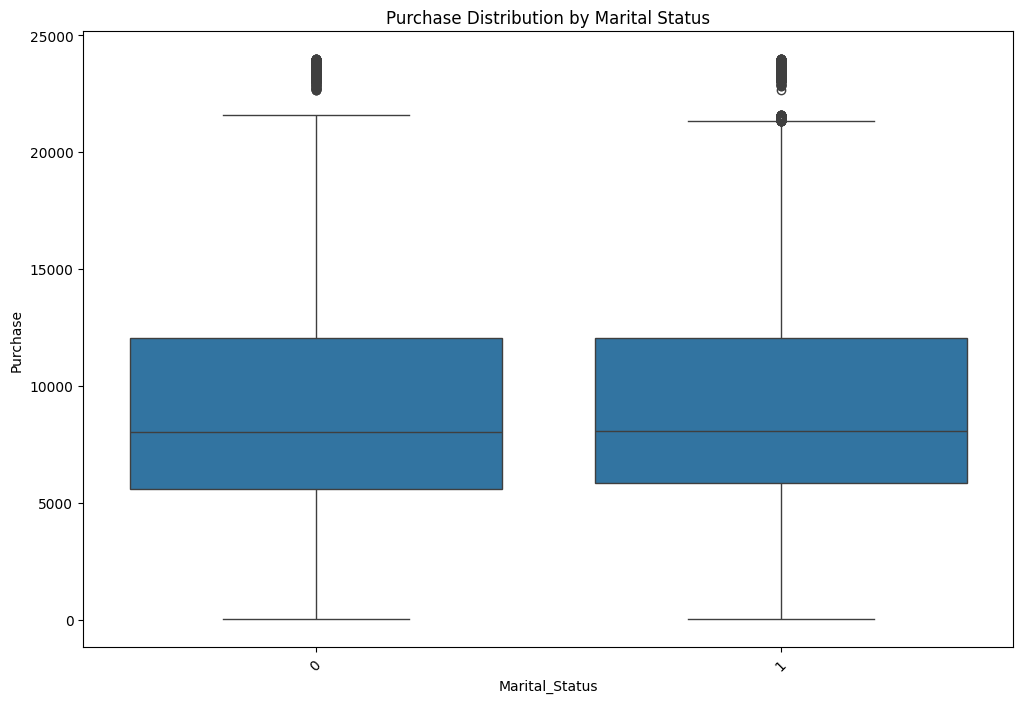

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Marital_Status', y='Purchase', data=df_wallmart)
plt.title("Spending Patterns by Marital Status", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Purchase Distribution by Marital Status")

In [ ]:
#Outlier detection using IQR wrt Marital Status.
Q1_A=np.percentile(M0['Purchase'],25)
Q3_A=np.percentile(M0['Purchase'],75)
IQR=Q3_A-Q1_A
upper_limit=Q3_A+(1.5*IQR)
outlier=M0[M0['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544015,1005759,P00200642,F,26-35,1,A,2,0,10,23680
544417,1005811,P00117642,M,18-25,4,B,3,0,10,23284
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724


In [ ]:
Q1_A=np.percentile(M1['Purchase'],25)
Q3_A=np.percentile(M1['Purchase'],75)
IQR=Q3_A-Q1_A
upper_limit=Q3_A+(1.5*IQR)
outlier=M1[M1['Purchase']>upper_limit]
outlier

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
3166,1000523,P00117642,M,51-55,7,A,1,1,10,23159
3167,1000523,P00200642,M,51-55,7,A,1,1,10,23741
4148,1000679,P00052842,M,36-45,16,C,4+,1,10,23384
5907,1000957,P00085342,M,36-45,1,C,2,1,10,23650
5953,1000968,P00159542,M,51-55,12,A,4+,1,10,23126
...,...,...,...,...,...,...,...,...,...,...
543515,1005680,P00087042,M,51-55,20,A,4+,1,10,23273
543823,1005736,P00052842,M,26-35,1,A,3,1,10,23642
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [ ]:
#Confidence intervals and distribution of the mean of the expenses by Marital Status:
#Sample size= 10,0000##

sample_0 = df_wallmart[df_wallmart['Marital_Status'] == 0]['Purchase'].sample(n=10000, random_state=42)
sample_1 = df_wallmart[df_wallmart['Marital_Status'] == 1]['Purchase'].sample(n=10000, random_state=42)


#CI for Marital Status 0 :
n1=len(sample_0)
sigma1=sample_0.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_0.mean()
ci_0 = stats.norm.interval(0.95, loc=mean1, scale=se1)


#CI for Marital Status 1:
n2=len(sample_1)
sigma2=sample_1.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_1.mean()
ci_1 = stats.norm.interval(0.95, loc=mean2, scale=se2)

print("Confidence interval for Marital status 0 at 95%:",ci_0)
print("Confidence interval for Marital status 1 at 95%:",ci_1)

Confidence interval for Marital status 0 at 95%: (np.float64(9213.635197339632), np.float64(9412.972202660369))
Confidence interval for Marital status 1 at 95%: (np.float64(9175.972752839694), np.float64(9373.959047160304))


In [ ]:
#At confidence level of 90%:
#CI for Marital Status 0 :
n1=len(sample_0)
sigma1=sample_0.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_0.mean()
ci_0 = stats.norm.interval(0.90, loc=mean1, scale=se1)


#CI for Marital Status 1:
n2=len(sample_1)
sigma2=sample_1.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_1.mean()
ci_1 = stats.norm.interval(0.90, loc=mean2, scale=se2)

print("Confidence interval for Marital status 0 at 90%:",ci_0)
print("Confidence interval for Marital status 1 at 90%:",ci_1)

Confidence interval for Marital status 0 at 90%: (np.float64(9229.659255823031), np.float64(9396.94814417697))
Confidence interval for Marital status 1 at 90%: (np.float64(9191.888232025309), np.float64(9358.04356797469))


In [ ]:
#At confidence level of 99%:
n1=len(sample_0)
sigma1=sample_0.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_0.mean()
ci_0 = stats.norm.interval(0.99, loc=mean1, scale=se1)


#CI for Marital Status 1:
n2=len(sample_1)
sigma2=sample_1.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_1.mean()
ci_1 = stats.norm.interval(0.99, loc=mean2, scale=se2)

print("Confidence interval for Marital status 0 at 99%:",ci_0)
print("Confidence interval for Marital status 1 at 99%:",ci_1)

Confidence interval for Marital status 0 at 99%: (np.float64(9182.317084011918), np.float64(9444.290315988083))
Confidence interval for Marital status 1 at 99%: (np.float64(9144.866851590248), np.float64(9405.06494840975))


In [ ]:
M0_1=M0['Purchase'].mean()
M1_1=M1['Purchase'].mean()
gap=M0_1-M1_1
print(gap)
gap_percentage_M=(gap/M1_1)*100
gap_percentage_M

4.733044839133072


np.float64(0.05110631271738053)

In [ ]:
# A Hypothesis test to confirm:
import scipy.stats as stats
t_stat, p_value = stats.ttest_ind(M0['Purchase'], M1['Purchase'])
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

T-statistic: 0.3436698055440526
P-value: 0.7310947525758316
The difference is not statistically significant.


"The difference in purchases between marital status categories is not statistically significant."

In [ ]:
#below is for sample size of 5000.#####

In [ ]:
#Confidence intervals and distribution of the mean of the expenses by Marital Status:
#Sample size= 5000##

sample_0 = df_wallmart[df_wallmart['Marital_Status'] == 0]['Purchase'].sample(n=5000, random_state=42)
sample_1 = df_wallmart[df_wallmart['Marital_Status'] == 1]['Purchase'].sample(n=5000, random_state=42)


#CI for Marital Status 0 :
n1=len(sample_0)
sigma1=sample_0.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_0.mean()
ci_0 = stats.norm.interval(0.95, loc=mean1, scale=se1)


#CI for Marital Status 1:
n2=len(sample_1)
sigma2=sample_1.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_1.mean()
ci_1 = stats.norm.interval(0.95, loc=mean2, scale=se2)

print("Confidence interval for Marital status 0 at 95%:",ci_0)
print("Confidence interval for Marital status 1 at 95%:",ci_1)

Confidence interval for Marital status 0 at 95%: (np.float64(9227.226018331312), np.float64(9509.461181668688))
Confidence interval for Marital status 1 at 95%: (np.float64(9136.728647130323), np.float64(9418.687352869678))


In [ ]:
#At confidence level of 90%:
#CI for Marital Status 0 :
n1=len(sample_0)
sigma1=sample_0.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_0.mean()
ci_0 = stats.norm.interval(0.90, loc=mean1, scale=se1)


#CI for Marital Status 1:
n2=len(sample_1)
sigma2=sample_1.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_1.mean()
ci_1 = stats.norm.interval(0.90, loc=mean2, scale=se2)

print("Confidence interval for Marital status 0 at 90%:",ci_0)
print("Confidence interval for Marital status 1 at 90%:",ci_1)

Confidence interval for Marital status 0 at 90%: (np.float64(9249.91399217798), np.float64(9486.77320782202))
Confidence interval for Marital status 1 at 90%: (np.float64(9159.394397442973), np.float64(9396.021602557028))


In [ ]:
#At confidence level of 99%:
n1=len(sample_0)
sigma1=sample_0.std()
se1=sigma1/np.sqrt(n1)
mean1=sample_0.mean()
ci_0 = stats.norm.interval(0.99, loc=mean1, scale=se1)


#CI for Marital Status 1:
n2=len(sample_1)
sigma2=sample_1.std()
se2=sigma2/np.sqrt(n2)
mean2=sample_1.mean()
ci_1 = stats.norm.interval(0.99, loc=mean2, scale=se2)

print("Confidence interval for Marital status 0 at 99%:",ci_0)
print("Confidence interval for Marital status 1 at 99%:",ci_1)

Confidence interval for Marital status 0 at 99%: (np.float64(9182.883660442252), np.float64(9553.803539557748))
Confidence interval for Marital status 1 at 99%: (np.float64(9092.429723877854), np.float64(9462.986276122147))


#Contingency tables (Reasoning)

In [ ]:
#Are women spending more money per transaction than men? Why or Why not?
#General Info:
df_wallmart.groupby('Gender').agg({'Purchase': ['mean', 'median','min','max']}).reset_index()

Gender     Purchase                   
                 mean  median min    max
0      F  8734.565765  7914.0  12  23959
1      M  9437.526040  8098.0  12  23961

In [ ]:
#Are women spending more money per transaction than men? Why or Why not?
#Contingency tables:
pd.crosstab(df_wallmart["Gender"],df_wallmart['Age'],normalize='index')

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,0.037428,0.181343,0.373701,0.200060,0.097188,0.072852,0.037428
M,0.024185,0.181123,0.407559,0.199979,0.078458,0.069056,0.039639


Male dominate the 26-35 age group which can be the prime age fro working and spending. (this age group shows more soending capabilites in both male and female).
Female representation is lower in that age group compared to men.
(loylaty programs, discounts, could help retain the customers).

age groups of 51-55 and 55+ have very little purchases (both groups). So either walmart could bring in more products for the needed age groups or bring in offers for the prodcuts explict to the mentioned age groups.


In [ ]:
#Are women spending more money per transaction than men? Why or Why not?
#Contingency tables:
pd.crosstab(df_wallmart["Gender"],df_wallmart['City_Category'],normalize='index')

City_Category,A,B,C
Gender,,,
F,0.262899,0.425568,0.311533
M,0.270401,0.418523,0.311076


City B contributes the highest share of purchases from both males (41.85%) and females (42.56%).

City C has nearly equal but slightly lower percentages for both genders.

City A shows the lowest percentage of spending for both genders (F: 26.29%, M: 27.04%).

Focus marketing and promotional campaigns in City A to boost sales and bring it closer to the performance of City B.


Analyze specific factors in City B contributing to high sales (e.g., store presence, product mix, local preferences) and replicate successful strategies in City A.

In [ ]:
#Are women spending more money per transaction than men? Why or Why not?
#Contingency tables:
pd.crosstab(df_wallmart["Gender"],df_wallmart['Marital_Status'],normalize='index')

Marital_Status,0,1
Gender,,
F,0.580381,0.419619
M,0.593614,0.406386


Since the dataset does not specify whether Marital_Status = 0 refers to married or unmarried individuals, we are not making assumptions.

However, it's clear that category 0 contributes to higher spending across both genders.

Focus on targeted marketing strategies toward the group labeled as Marital_Status = 1 to potentially boost their engagement and spending.

# **Method/Insights/Recommendation**

**Walmart Case Study:**


**Method:**

*   The Entire dataset was loaded.

*  Check for null values, outliers, described the data set, collected info
   (type) of the dataset.

*   Shape and overview of the data set was also performed.

*   EDA was done. value counts,unique values etc were done (kindly refer
     the pdf).


*   Graphical Analysis was also performed. (all necessary plots were plotted,
     Median was used becasue of outliers for heat maps).


*   Outlier checks using IQR was done.


*   Used the Central Limit Theorem to compute the Confidence interval at various intervals(
90%, 95%, or 99%). Also conducted this on two differnet sample sizes. Sample
size=10,000 and 5,000 repectively.


*   Contingency Tables were also created for reasoning.

















**Insights:**


*   It was found out that the most the popular item is P00265242. Where male customers have
brought this patricular item more than female customers.
Top 3 Most loyal Customers are Males.
*   Highest Spender is a Male (avergae Purchases), followed by Female.
Product P00265242 is not only popular among the two gender but also popular amonng
different city categories and among different marital status.
*  Group 0 has a higher average spend than Group 1, indicating a difference in purchasing
behavior.

*   (Note: since the data explicitly doesnt say which coding is related to the Marital Status i.e(
whether 0 is Unmarried, whether 1 is Married or vice-versa).Because even with the abiove
table. the avg spending is moe for 0 than 1.
So Assumptions cannot be made on which value is unmarried/married. Also the dataset is
based on Black Friday Sales, where assumptions would entirely make the data biased.)

*   Male Category spends more than Female Category. Age 26-35 has the highest spending.
Occupation 0,4 have the highest spending, City Category B has the highest spending,
Marital status 0 as the highest spending

*   People who have stayed for a year tend to spend more than the rest.
City Cateogy C has the highest has the highest median purchases (Median was used
becasue of outliers).
*  Age 51-55 has the highest has the highest median purchases.



*   Age 51-55 has the highest has the highest median purchases.



*   Medians are almost the same for Male and Female (overall). Males spending behaviour is
higher. Outliers are present.


*   Underlying Distribution was plotted to observe the shape of the distribution and it
was not normal.

*   The wider interval for males suggests that their purchase amounts tend to be higher, and
the interval for females suggests that their purchase amounts are lower. Average spending
of male is 8.04% more than female.

*   We observed no overlap in the 95% confidence intervals of average spending between
male and female customers, suggesting a statistically significant difference. Even at 99%
confidence, this gap persists, reinforcing the conclusion.

*   Medians are almost the same for differnt age groups, with differnt spending
patterns.Outliers are present


*   Based on the 95% confidence interval: The 0–17 age group has the lowest purchase range,
with a CI of (₹8813 – ₹9013).This suggests a lower engagement or spending capacity. The
51–55 age group shows the highest average spending, with a CI of (₹9422 – ₹9619). The
other groups — 18–25, 26–35, 36–45, 46–50, and 55+ — all fall into a mid-range band
(₹9123 – ₹9491). There is a gap of 6.73% from the best age group to the underperforming.
Medians are almost the same for differnt Marital Status. with slightly different spending
patterns. Outliers are present.
*   The difference in purchases between marital status categories is not statistically
significant. (Performed a Hypotheisis test to confirm).


*   Contingency tables:  Male customers spend more than female.
Male dominate the 26-35 age group which can be the prime age fro working and spending.
(this age group shows more soending capabilites in both male and female).
Female representation is lower in that age group compared to men.
(loylaty programs, discounts, could help retain the customers).
Age groups of 51-55 and 55+ have very little purchases (both groups). So either walmart
could bring in more products for the needed age groups or bring in offers for the prodcuts
explict to the mentioned age groups.
City B contributes the highest share of purchases from both males (41.85%) and females
(42.56%).
City C has nearly equal but slightly lower percentages for both genders.
City A shows the lowest percentage of spending for both genders (F: 26.29%, M: 27.04%).
Since the dataset does not specify whether Marital_Status = 0 refers to married or
unmarried individuals, we are not making assumptions.
However, it's clear that category 0 contributes to higher spending across both genders.

**Reccomendations:**


*   Walmart could explore tailored strategies for Group 1 to increase engagement.


*   More tailored marketing strategies towards female could help close the gap between avg
male and avg female spending. Also continue customer retention for males(to close the
gap of 8.04%).


*   The 0–17 age group has the lowest purchase range, with a CI of (₹8813 – ₹9013).Focus
marketing and engagement efforts on 0–17 to increase their purchase behavior. The gap of
at least 6.73% can be covered with a tailored marketing approach. The 51–55 age group
shows the highest average spending, with a CI of (₹9422 – ₹9619). Retain and nurture the
51–55 group to maintain high-value transactions. The other groups — 18–25, 26–35, 36–45,
46–50, and 55+ — all fall into a mid-range band (₹9123 – ₹9491). Optimize mid-tier groups
to elevate them toward the top-tier performance.



*   Focus marketing and promotional campaigns in City A to boost sales and bring it closer to
the performance of City B. Analyze specific factors in City B contributing to high sales (e.g.,
store presence, product mix, local preferences) and replicate successful strategies in City A.

*   Focus on targeted marketing strategies toward the group labeled as Marital_Status = 1 to
potentially boost their engagement and spending.







